<a href="https://colab.research.google.com/github/tesseract314/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# King County Housing Data - Linear Regression Assignment

Data for this assignment was obtained from Kaggle: <https://www.kaggle.com/harlfoxem/housesalesprediction>

Complete the following challenges below to improve iteratively your home price estimation and practice implementing predictive linear regression models. 

# Bivariate Regression

Pick the X variable that you think will be the most correlated with Y. 

Split your dataset into a 20-80 test-train-split (80% of data for training, and 20% for testing).

Train a regression model using this single X and single Y variable. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your line of best fit to the graph.

Report your Root Mean Squared Error and R-Squared for this model.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/kc_house_data.csv')
pd.set_option('display.max_columns', 100)
print(df.shape)
df.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [2]:
df.corr().head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286


In [0]:
from sklearn.model_selection import train_test_split

y = df['price']
X = df[['sqft_living']]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, Y_train)

print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

Coefficient: 
 [279.55477932]

 Intercept:  -41999.18603993731


In [32]:
y_test_predict = model.predict(X_test)

#MSE = mean_squared_error(Y_test, y_test_predict)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
R2 = r2_score(Y_test, y_test_predict)

RMSE, R2

(276559.1746114674, 0.49406905389089006)

In [0]:
# It appears the 'grade' variable gives us the best RMSE and R^2

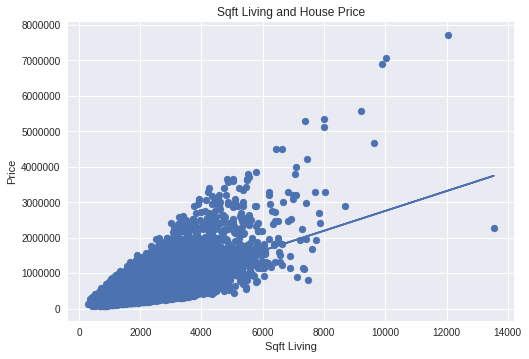

In [33]:
m_hat = model.coef_[0]
b_hat = model.intercept_

# Plot the points
plt.scatter(df['sqft_living'], df['price'])

# Plot the line
#y_hat = [m_hat*x + b_hat for x in X]
plt.plot(X, model.predict(X))

# Graph axes and title
plt.ylabel("Price")
plt.xlabel("Sqft Living")
plt.title("Sqft Living and House Price")
plt.show()

# Two-variable Multiple Regression

To ramp up slowly, pick a second X variable that you think will be the most correlated with Y. 

Split your dataset into a 50-50 test-train-split (50% of data for training, and 50% for testing).

Train a regression model using these two X variables. Once you have trained the model and obtained its coefficients, plot the points on a graph and fit your **plane** of best fit to the graph.

Report your Root Mean Squared Error and R-squared for this model.

In [8]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [0]:
X2 = df[['grade', 'sqft_living']]

X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, y, test_size=.2, random_state=42)

In [10]:
model.fit(X2_train, Y2_train)

print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

Coefficient: 
 [96261.37224464   185.10393866]

 Intercept:  -582887.8020468557


In [0]:
beta_0 = model.intercept_
beta_i = model.coef_[0]

In [12]:
y2_test_predict = model.predict(X2_test)

RMSE2 = (np.sqrt(mean_squared_error(Y2_test, y2_test_predict)))
R22 = r2_score(Y2_test, y2_test_predict)

RMSE2, R22

(264262.2149524917, 0.5380603453464137)

In [0]:
# 'grade' and 'sqft_living' seem to be the best 2-variable combination

IndexError: ignored

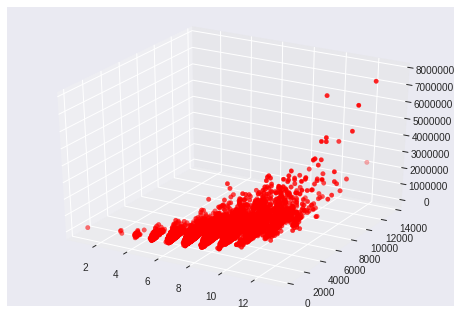

In [14]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot Points on 3D plot
ax.scatter(df['grade'], df['sqft_living'], df['price'],c='red')

# Set axes to size of scatter data
x1 = np.array(ax.get_xlim())
y1 = np.array(ax.get_ylim())
xx, yy = np.meshgrid(x1,y1)
zz = beta_i[0]*xx + beta_i[1]*yy + beta_0[0]

# Plot Plane
plt3d = plt.gca(projection='3d')

# Add Opacity to Plane 
plt3d.plot_surface(xx, yy, zz,alpha=0.5)
plt.title("Regression Plane")

plt.show()

# Multiple Regression

Now using all available X variables, split your data into test and training datasets, train your model, obtain its coefficients, and report the Root Mean Squared Error and R-squared values.

In [15]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [0]:
X3 = df.drop(['date', 'price'], axis=1)

X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, y, test_size=.2, random_state=42)

In [17]:
model.fit(X3_train, Y3_train)

print("Coefficient: \n", model.coef_)
print("\n Intercept: ", model.intercept_)

Coefficient: 
 [-1.33978221e-06 -3.43074736e+04  4.45861014e+04  1.08944477e+02
  8.05637972e-02  7.01981320e+03  5.61992102e+05  5.37898653e+04
  2.43817431e+04  9.47120482e+04  6.99457981e+01  3.89986788e+01
 -2.68205192e+03  2.02428706e+01 -5.51831873e+02  5.95402284e+05
 -1.92574700e+05  2.11354355e+01 -3.39559834e-01]

 Intercept:  6883865.792583189


In [18]:
y3_test_predict = model.predict(X3_test)

RMSE3 = (np.sqrt(mean_squared_error(Y3_test, y3_test_predict)))
R23 = r2_score(Y3_test, y3_test_predict)

RMSE3, R23

(212520.15852831525, 0.7012448735876526)

In [0]:
# the multiple regression with all variables is very accurate

# Stretch Goals

Pick from these stretch goals the tasks that you feel like will be the most beneficial for you. 

- Start to research Polynomial Regression and Log-Linear Regression (tomorrow's topics). Find a new regression dataset and try to implement one of these models. 
- Research "Feature Engineering" see what features you can engineer on the above dataset. How much are you able to improve your accuracy with feature engineering?
- Explore the concept of $R^2$, learn how it is calculated and how it relates to covariance, correlation, and variance. 
- Further explore the concept of "Model Validation" - we'll spend a whole week on this soon. What other measures of model accuracy could we have used besides Root Mean Squared Error?
- AMES Housing Prediction Kaggle Competition: <https://www.kaggle.com/c/house-prices-advanced-regression-techniques>
- **WRITE A BLOG POST** explaining the basics of Linear Regression.

Remember to share your findings in the slack channel. :)


In [0]:
X4 = df.drop(['date', 'price'], axis=1)
y4 = np.log(df['price'])

In [0]:
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, y4, test_size=.2, random_state=10)

In [36]:
model.fit(X4_train, Y4_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
model.coef_

array([ 7.50709943e-13, -1.22025845e-02,  6.44552188e-02,  9.64635254e-05,
        4.49700901e-07,  6.92159219e-02,  3.87233240e-01,  5.86466516e-02,
        6.44250259e-02,  1.60961454e-01,  4.25829012e-05,  5.38806243e-05,
       -3.31480896e-03,  3.95737754e-05, -6.26685815e-04,  1.39659760e+00,
       -1.58651588e-01,  9.72179268e-05, -3.17086117e-07])

In [38]:
model.intercept_

-6.931045988180301

In [39]:
y4_test_predict = model.predict(X4_test)
y4_test_predict

array([12.64210673, 13.14001241, 11.34840857, ..., 13.78454025,
       12.96128972, 13.19905079])

In [40]:
RMSE4 = (np.sqrt(mean_squared_error(Y4_test, y4_test_predict)))
R24 = r2_score(Y4_test, y4_test_predict)

RMSE4, R24

(0.24966373419550453, 0.7749424854598593)

In [0]:
from sklearn.decomposition import PCA